In [1]:
from DecisionTree2 import DTLearner
import numpy as np
import timeit
from sklearn.model_selection import train_test_split

#Data
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,0:-2]
output1=data[:,-2:-1]
output1[output1<=22.3] = -1 #small heating load
output1[output1> 22.3] = 1 #large heating load

output2=data[:,-1:-1]
output2[output2<=24.6] = -1 #small cooling load
output2[output2> 24.6] = 1 #large cooling load

#Split into test and train data
vals=[0.1, 0.25, 0.35, 0.50, 0.65, 0.75, 0.9]
errortrain1=[]
errortest1=[]
#vals=[0.99]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output1, test_size=val)
    num=X_train.shape[0] #number of rows
    dist=np.ones(num)/num

    iterat=0
    hypothesis=[]
    alphas=[]
    while iterat <12:
        iterat+=1
        #D1, construct h1
        learner=DTLearner(leaf_size=1)
        iter= learner.add_evidence(X_train, y_train)
        yresulttrain=learner.query(X_train)
        error=yresulttrain-y_train.ravel()
        error=abs(error)/2
        percenerror=sum(error*dist)
        #calculate alpha
        alpha=0.5*np.log((1-percenerror)/percenerror)
        for x in range(num):
            dist[x]=(dist[x])*np.exp(-1*alpha*y_train[x]*yresulttrain[x])
        totaldist=np.sum(dist)
        dist=dist/totaldist
        alphas.append(alpha)
        hypothesis.append(learner)
    capitalH=[]
    #train data prediction
    for j in range(num): #for all of the rows
        sgn=0
        for k in range(len(alphas)):#for all of the distributions
            sgn+=alphas[k]*hypothesis[k].query(X_train[j].reshape(1,-1)) #sum of distribtuion over all of the distributions
        capitalH.append(sgn[0])
    ytrainpredic1=capitalH
    ytrainpredic1=np.sign(capitalH)

    #train error
    error=ytrainpredic1-y_train.ravel()
    error=abs(error/2)
    errortrain=sum(error)/y_train.size
    errortrain1.append(errortrain)

    capitalH=[]
    #test data prediction
    for j in range(y_test.shape[0]): #for all of the rows
        sgn=0
        for k in range(len(alphas)):#for all of the distributions
            sgn+=alphas[k]*hypothesis[k].query(X_test[j].reshape(1,-1)) #sum of distribtuion over all of the distributions
        capitalH.append(sgn[0])
    ytestpredic1=np.sign(capitalH)

    #test error
    error=ytestpredic1-y_test.ravel()
    error=abs(error/2)
    errortest=sum(error)/y_test.size
    errortest1.append(errortest)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


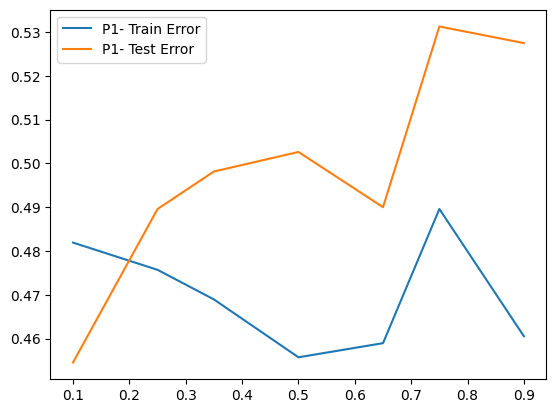

In [4]:
import matplotlib.pyplot as plt
plt.plot(vals,errortrain1, vals, errortest1)
plt.legend(["P1- Train Error", "P1- Test Error"])